In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import matplotlib as mpl
import seaborn as sns
import koreanize_matplotlib


mpl.rc('font', family='AppleGothic')

ilgan = pd.read_csv('일간기온전처리.csv', encoding='euc-kr')
ilgan.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
ilgan['날짜'] = ilgan['날짜'].str.replace('\t', '')

ilgan['날짜'] = ilgan['날짜'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
ilgan[ilgan['날짜'].dt.month == 1]

pok = pd.read_csv('폭염전처리.csv', encoding='euc-kr')
pok.head()
# pok.dtypes

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
0,평년,0,0,0,0,0.1,0.6,3.1,5,0,0,0,0,8.8,NaN
1,1973,0,0,0,0,0.0,0.0,4.0,3,0,0,0,0,7.0,23.0
2,1974,0,0,0,0,0.0,0.0,0.0,2,0,0,0,0,2.0,40.0
3,1975,0,0,0,0,0.0,0.0,1.0,8,0,0,0,0,9.0,20.0
4,1976,0,0,0,0,0.0,1.0,1.0,0,0,0,0,0,2.0,40.0


In [149]:
pok1 = pok.dropna()
pok1

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
1,1973,0,0,0,0,0.0,0.0,4.0,3,0,0,0,0,7.0,23.0
2,1974,0,0,0,0,0.0,0.0,0.0,2,0,0,0,0,2.0,40.0
3,1975,0,0,0,0,0.0,0.0,1.0,8,0,0,0,0,9.0,20.0
4,1976,0,0,0,0,0.0,1.0,1.0,0,0,0,0,0,2.0,40.0
5,1977,0,0,0,0,0.0,2.0,8.0,1,0,0,0,0,11.0,14.0
6,1978,0,0,0,0,0.0,0.0,8.0,5,0,0,0,0,13.0,11.0
7,1979,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,44.0
8,1980,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,44.0
9,1981,0,0,0,0,0.0,0.0,4.0,1,0,0,0,0,5.0,28.0
10,1982,0,0,0,0,0.0,0.0,2.0,4,0,0,0,0,6.0,26.0


In [150]:
yeol = pd.read_csv('열대야전처리.csv', encoding='euc-kr')
# yeol.head()

yeol1 = yeol.dropna()
yeol1
# yeol1.dtypes

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
2,1908,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0,0,3.0,80.0
3,1909,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0,0,0,5.0,56.0
4,1910,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0,0,3.0,79.0
5,1911,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0,0,0,3.0,78.0
6,1912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0,0,0,13.0,19.0
115,2021,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,0.0,0,0,0,21.0,7.0
116,2022,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,0,0,0,24.0,5.0
117,2023,0.0,0.0,0.0,0.0,0.0,1.0,9.0,14.0,1.0,0,0,0,25.0,4.0


In [151]:
kion = pd.read_csv('일간기온전처리.csv', encoding='euc-kr')
kion.head()
# kion.dtypes

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108.0,13.5,7.9,20.7
1,\t1907-10-02,108.0,16.2,7.9,22.0
2,\t1907-10-03,108.0,16.2,13.1,21.3
3,\t1907-10-04,108.0,16.5,11.2,22.0
4,\t1907-10-05,108.0,17.6,10.9,25.4


In [152]:
pok['연합계'].mean()

8.015094339622642

In [153]:
pok['연도'].index

RangeIndex(start=0, stop=53, step=1)

In [154]:
yeol1 = yeol1.astype('object')
# drop last iloc

yeol1.drop(yeol1.tail(1).index, inplace=True)
yeol1

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
2,1908,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0,0,3.0,80.0
3,1909,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0,0,0,5.0,56.0
4,1910,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0,0,3.0,79.0
5,1911,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0,0,0,3.0,78.0
6,1912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2019,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,0,0,0,17.0,11.0
114,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0,0,0,13.0,19.0
115,2021,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,0.0,0,0,0,21.0,7.0
116,2022,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,0,0,0,24.0,5.0


In [155]:
yeol1.tail()

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
113,2019,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,0,0,0,17.0,11.0
114,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0,0,0,13.0,19.0
115,2021,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,0.0,0,0,0,21.0,7.0
116,2022,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,0,0,0,24.0,5.0
117,2023,0.0,0.0,0.0,0.0,0.0,1.0,9.0,14.0,1.0,0,0,0,25.0,4.0


([<matplotlib.axis.XTick at 0x2aeb53ed0>,
 [Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0, 0, ''),
  Text(116.0

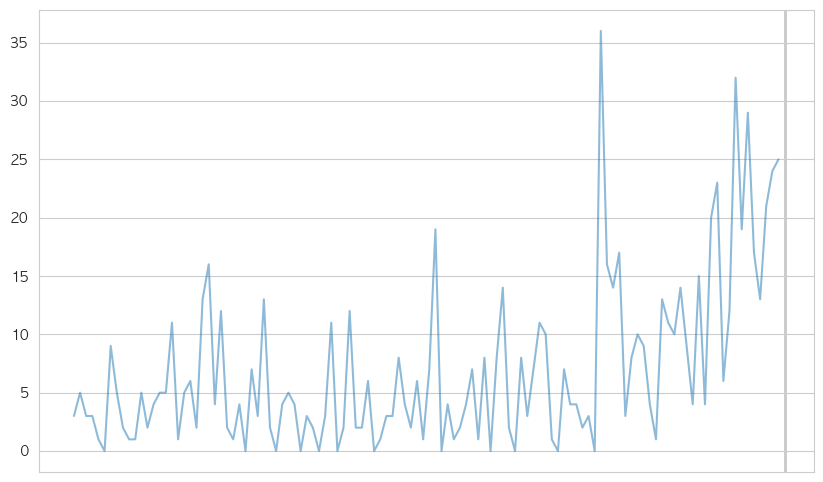

In [156]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(yeol1['연도'], yeol1['연합계'], alpha=0.5, label='열대야')
plt.xticks(["" for x in yeol1['연도'].tolist()])

# plt.xlabel()
# ax.plot(yeol['연합계'], color='gray')

# ax.legend()
# ax.set_xlim(0,30)

<BarContainer object of 103 artists>

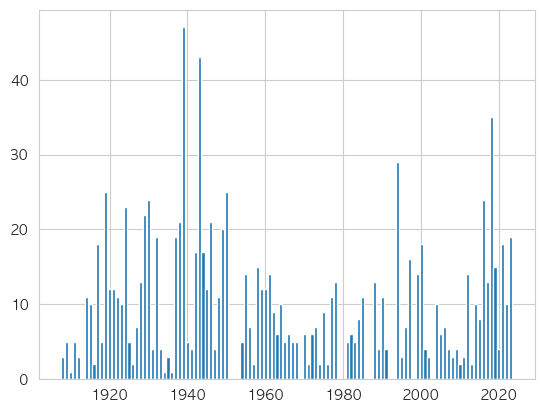

In [157]:
pokdf = ilgan[ilgan['최고기온'] >= 33].copy()
pokdf['년도'] = pokdf['날짜'].dt.year
pokcount = pokdf.groupby('년도').count()['최고기온']

plt.bar(pokcount.index, 
        pokcount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 117 artists>

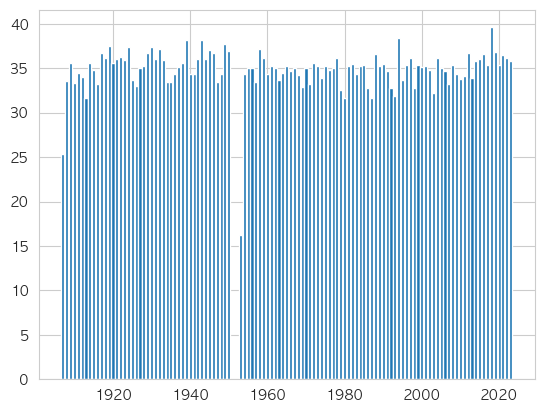

In [158]:
tmpmaxdf = ilgan.copy()
tmpmaxdf['년도'] = tmpmaxdf['날짜'].dt.year
tmpmaxcount = tmpmaxdf.groupby('년도').max()['최고기온']

plt.bar(tmpmaxcount.index, 
        tmpmaxcount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 87 artists>

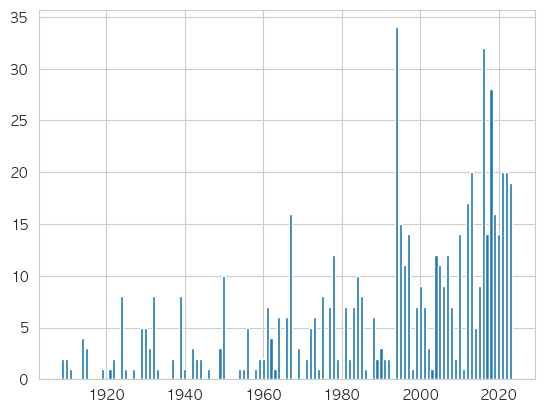

In [159]:
yeoldf = ilgan[ilgan['최저기온'] >= 25].copy()
yeoldf['년도'] = yeoldf['날짜'].dt.year
yeolcount = yeoldf.groupby('년도').count()['최고기온']

plt.bar(yeolcount.index, 
        yeolcount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

<BarContainer object of 117 artists>

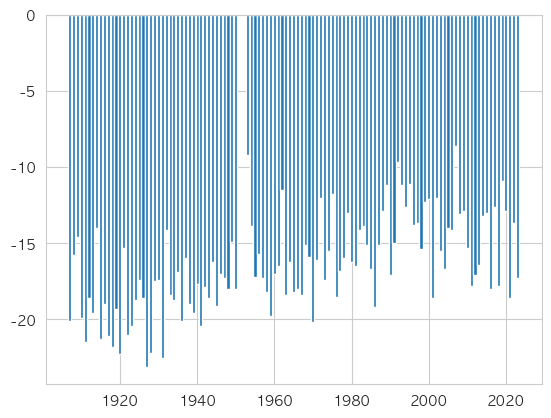

In [160]:
tmpmindf = ilgan.copy()
tmpmindf['년도'] = tmpmindf['날짜'].dt.year
tmpmincount = tmpmindf.groupby('년도').min()['최저기온']

plt.bar(tmpmincount.index, 
        tmpmincount,
        align='center',
        )

<BarContainer object of 106 artists>

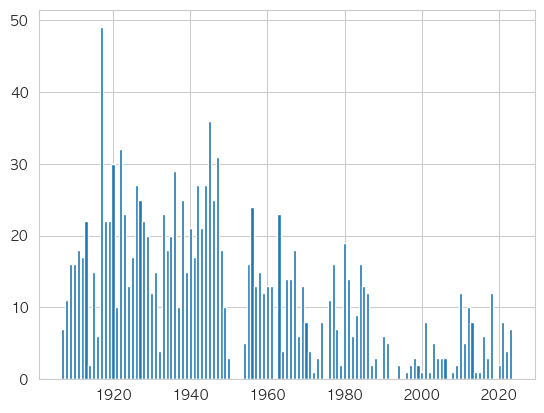

In [161]:
handf = ilgan[ilgan['최저기온'] <= -12].copy()
handf['년도'] = handf['날짜'].dt.year
hancount = handf.groupby('년도').count()['최고기온']

plt.bar(hancount.index, 
        hancount,
        align='center',
        )
# plt.xticks(["" for x in range(resultcount.shape[0])])

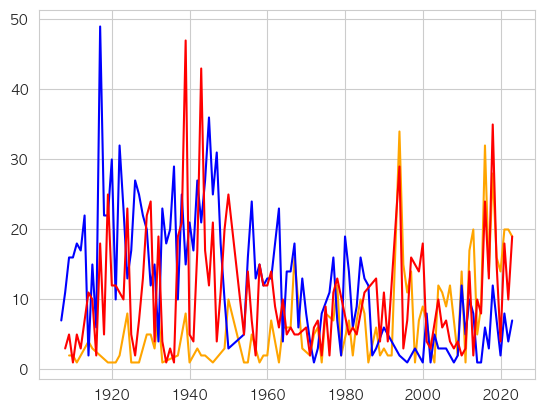

In [162]:
# tmpdf = ilgan[ilgan['최저기온'] <= -12].copy()
# tmpdf['년도'] = tmpdf['날짜'].dt.year
# resultcount = tmpdf.groupby('년도').count()['최고기온']

plt.plot(yeolcount, color='orange')
plt.plot(hancount, color='blue')
plt.plot(pokcount, color='red')
# plt.xticks(["" for x in range(resultcount.shape[0])])

In [163]:
yeolcount

년도
1909     2
1910     2
1911     1
1914     4
1915     3
        ..
2019    16
2020    14
2021    20
2022    20
2023    19
Name: 최고기온, Length: 87, dtype: int64

In [164]:
sns.heatmap(yeolcount,)

IndexError: Inconsistent shape between the condition and the input (got (87, 1) and (87,))

In [ ]:
a

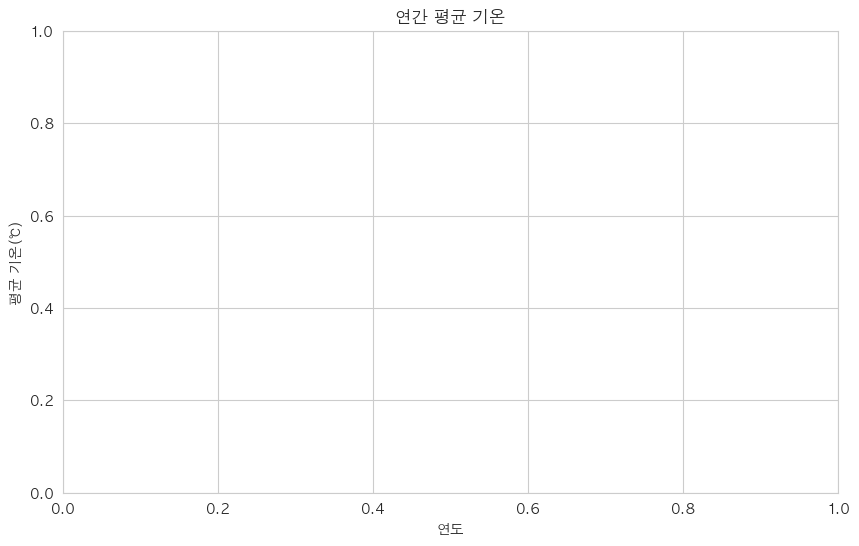

2       3.0
3       5.0
4       3.0
5       3.0
6       1.0
       ... 
113    17.0
114    13.0
115    21.0
116    24.0
117    25.0
Name: 연합계, Length: 116, dtype: object

In [125]:
plt.figure(figsize=(10, 6))
plt.title('연간 평균 기온')
plt.xlabel('연도')
plt.ylabel('평균 기온(℃)')
plt.grid(True)
plt.show()

yeol1['연합계']

In [126]:
plt.figure(figsize=(14, 6))
plt.plot(annual_avg_temp.index, annual_avg_temp.values, marker='o', linestyle='-', color='blue')
plt.title('연간 평균 기온')
plt.xlabel('연도')
plt.ylabel('평균 기온(℃)')
plt.grid(True)
plt.show()

NameError: name 'annual_avg_temp' is not defined

<Figure size 1400x600 with 0 Axes>

In [127]:
ilgan = pd.read_csv('일간기온전처리.csv', encoding='euc-kr')
ilgan.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
ilgan['날짜'] = ilgan['날짜'].str.replace('\t', '')

ilgan['날짜'] = ilgan['날짜'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
ilgan[ilgan['날짜'].dt.month == 1]

,날짜,지점,평균기온,최저기온,최고기온
92,1908-01-01,108.0,-5.9,-9.1,-1.3
93,1908-01-02,108.0,-7.7,-13.9,-3.0
94,1908-01-03,108.0,-6.2,-10.8,-2.9
95,1908-01-04,108.0,-7.5,-12.8,-1.7
96,1908-01-05,108.0,-4.8,-11.3,-0.1
...,...,...,...,...,...
41691,2023-01-27,108.0,-7.3,-9.6,-3.8
41692,2023-01-28,108.0,-6.0,-11.2,-0.6
41693,2023-01-29,108.0,-1.8,-8.0,4.9
41694,2023-01-30,108.0,-0.9,-4.4,4.2
